In [462]:
import pandas as pd
import numpy as np

import openpyxl

data = pd.read_excel('FR2209_assessment_data.xlsx', index_col=0, header=0)
data = data.iloc[:121,:]

stocks = data.loc[:,['BYD','DNB','IAG','SAM','CHM','X']]

returns = stocks.pct_change()
std = returns.std()
mean = returns.mean()


returns



,BYD,DNB,IAG,SAM,CHM,X
date,,,,,,
2013-01-31,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-28,-0.062767,0.065856,0.075332,0.085985,0.065668,-0.065486
2013-03-29,0.258752,-0.017578,0.060728,0.055986,0.109166,-0.064299
2013-04-30,0.451028,0.115651,0.098254,-0.015033,-0.026455,-0.087180
2013-05-31,0.085833,0.018199,0.005871,0.059864,0.024632,-0.003596
...,...,...,...,...,...,...
2022-08-31,-0.019456,-0.092640,-0.129345,0.170433,-0.068707,-0.030908
2022-09-30,-0.121827,-0.130526,-0.159940,-0.011528,-0.170479,-0.207696
2022-10-31,0.212171,0.037127,0.319528,-0.112438,-0.085301,0.123621


In [463]:
#asssume the risk free of 0.5%, calculate the excess return for each stock
R_f = 0.05
excessret = mean - R_f /12
excessret

BYD    0.582069
DNB    0.398071
IAG    0.257447
SAM    0.248595
CHM    0.197914
X      0.189037
dtype: float64

In [464]:
#sharpe for each stock
sharpe = excessret/returns.std()
sharpe

BYD    0.093848
DNB    0.087026
IAG    0.133022
SAM    0.108607
CHM    0.110028
X      0.094973
dtype: float64

In [465]:
#returns variance / covariance matrix 
VarCov_Mat = returns.cov()
VarCov_Mat

,BYD,DNB,IAG,SAM,CHM,X
BYD,38.468336,28.357208,7.463509,-0.101051,-0.034629,12.280237
DNB,28.357208,20.922912,5.493531,-0.077406,-0.023190,9.055468
IAG,7.463509,5.493531,3.745670,-0.012002,-0.036343,2.407210
SAM,-0.101051,-0.077406,-0.012002,5.239277,0.368444,0.004649
CHM,-0.034629,-0.023190,-0.036343,0.368444,3.235537,-0.010240
X,12.280237,9.055468,2.407210,0.004649,-0.010240,3.961793


In [466]:
import numpy as np
from itertools import combinations, permutations, product

# Generate permutations of weights in multiples of 0.1
permutations = product(range(11), repeat=len(mean))

# Filter permutations where the sum equals 10 (1 in multiples of 0.1)
valid_permutations = [p for p in permutations if sum(p) == 10]

# Convert permutations to multiples of 0.1 and normalize each permutation
normalized_permutations = [[weight / 10 for weight in p] for p in valid_permutations]

# print(normalized_permutations)

In [467]:
weighted_ret = [[weight * mean for weight, mean in zip(p, mean)] for p in normalized_permutations]
# Sum of weights method
portfolio_rets = [sum(weights) for weights in weighted_ret]
# portfolio_rets

In [468]:
# w^T mean method
portfolio_rets2 = np.dot(normalized_permutations, mean)

In [469]:


portfolio_std = []

# Iterate over each normalized permutation of weights
for weights in normalized_permutations:
    # Calculate portfolio variance using the given formula
    portfolio_variance = (np.dot(weights, np.dot(VarCov_Mat, weights)))
    # Append the portfolio variance to the list
    portfolio_std.append(portfolio_variance)

Text(0, 0.5, 'Returns')

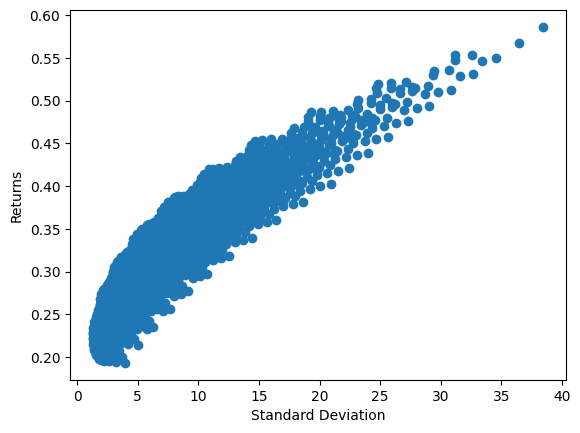

In [470]:
import matplotlib.pyplot as plt
plt.scatter(portfolio_std, portfolio_rets)
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')

In [471]:
sharpe_portolios = ((portfolio_rets2 - R_f / 12))/ portfolio_std
sharpe_portolios

array([0.04771496, 0.05862655, 0.07168831, ..., 0.01689008, 0.01545449,
       0.01513113])

In [472]:
max_sharpe_index = np.argmax(sharpe_portolios)
max_sharpe = max(sharpe_portolios)
# Retrieve the weights of the corresponding portfolio
optimal_weights = normalized_permutations[max_sharpe_index]
retmaxsharpe = portfolio_rets[max_sharpe_index]
stdmaxsharpe = portfolio_std[max_sharpe_index]
print('The portfolio with maximum Sharpe Ratio is: ', optimal_weights, ' with ratio: ', max_sharpe, ' The return on this portfolio is: ', retmaxsharpe, ' and Standard Deviation: ', stdmaxsharpe)

The portfolio with maximum Sharpe Ratio is:  [0.0, 0.0, 0.3, 0.2, 0.4, 0.1]  with ratio:  0.17355162647791658  The return on this portfolio is:  0.22918899868872156  and Standard Deviation:  1.29657287914088


In [473]:
min_std_index = np.argmin(portfolio_std)
min_std = min(portfolio_std)
# Retrieve the weights of the corresponding portfolio
min_std_weights = normalized_permutations[min_std_index]
retminstd = portfolio_rets[min_std_index]
print('The portfolio with minimum Standard Deviation is: ', min_std_weights, ' with Standard Deviation: ', min_std, ' The return on this portfolio is: ', retminstd)

The portfolio with minimum Standard Deviation is:  [0.0, 0.0, 0.2, 0.2, 0.4, 0.2]  with Standard Deviation:  1.2790416892364758  The return on this portfolio is:  0.2223479987414559


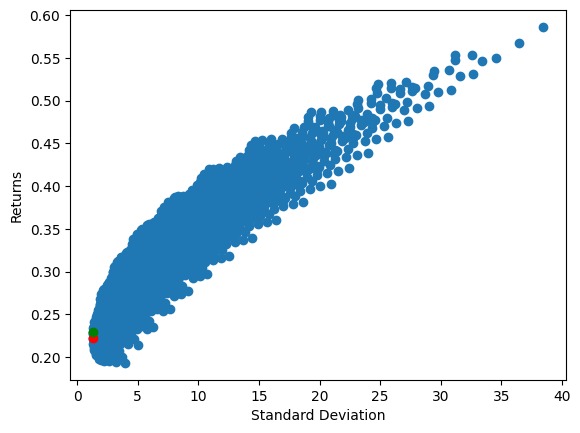

In [474]:
plt.scatter(portfolio_std, portfolio_rets)
plt.scatter(min_std, retminstd, color='r')
plt.scatter(stdmaxsharpe, retmaxsharpe, color='g')
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')
plt.show()